In [8]:
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [9]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [10]:
import matplotlib.pyplot as plt 
from mlxtend.plotting import scatterplotmatrix

(<Figure size 1200x1000 with 36 Axes>,
 array([[<Axes: xlabel='Overall Qual', ylabel='Count'>, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: xlabel='Overall Cond', ylabel='Overall Qual'>,
         <Axes: xlabel='Overall Cond', ylabel='Count'>, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >],
        [<Axes: xlabel='Total Bsmt SF', ylabel='Overall Qual'>,
         <Axes: xlabel='Total Bsmt SF', ylabel='Overall Cond'>,
         <Axes: xlabel='Total Bsmt SF', ylabel='Count'>, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: xlabel='Central Air', ylabel='Overall Qual'>,
         <Axes: xlabel='Central Air', ylabel='Overall Cond'>,
         <Axes: xlabel='Central Air', ylabel='Total Bsmt SF'>,
         <Axes: xlabel='Central Air', ylabel='Count'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='Gr Liv Area', ylabel='Overall Qual'>,
         <Axes: xlabel='Gr Liv Area', ylabel='Overall Cond'>,
         <Axes: xlabel='Gr Liv Area', ylabel='Total Bsmt SF'>,
 

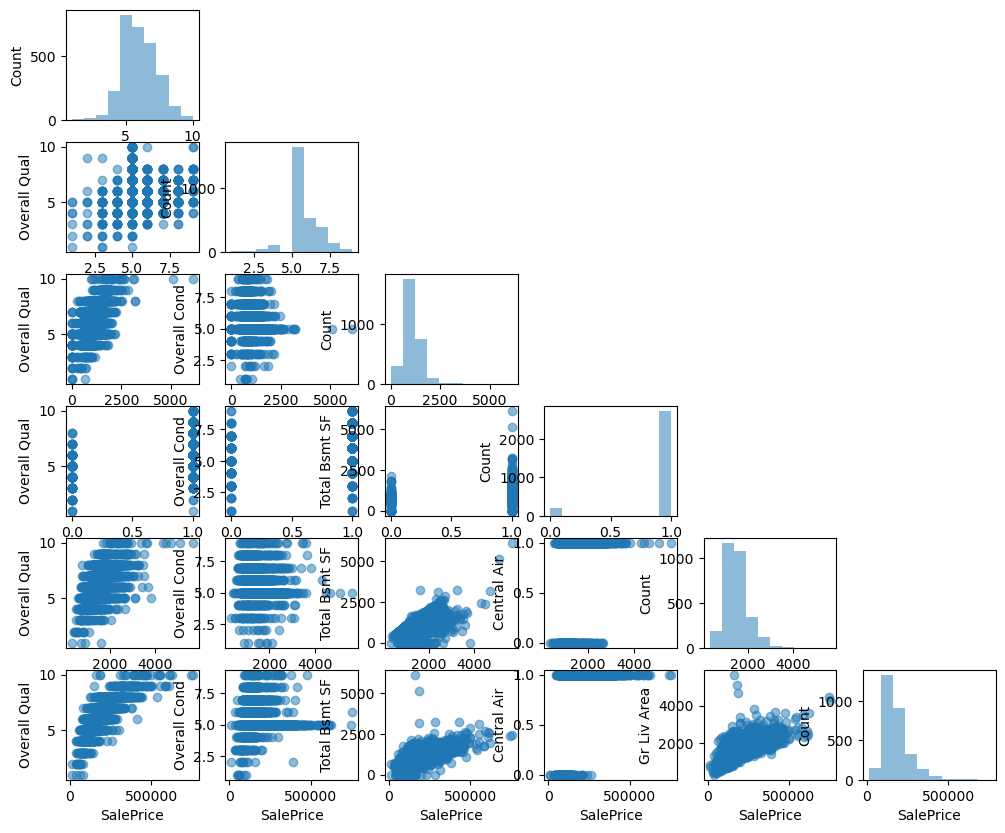

In [11]:
scatterplotmatrix(df.values, figsize=(12,10), names = df.columns, alpha =0.5)

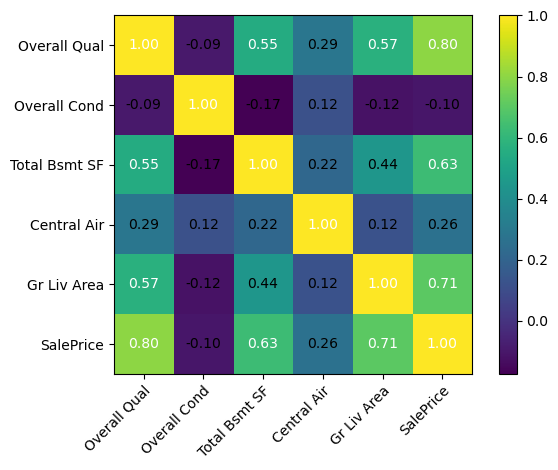

In [12]:
import numpy as np
from mlxtend.plotting import heatmap
cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)

plt.tight_layout()
#plt.savefig('figures/09_05.png', dpi=300)
plt.show()


In [13]:
X= df[['Gr Liv Area']].values
y = df['SalePrice'].values


In [14]:
from sklearn.preprocessing import StandardScaler

Data processing in sklearn almost always reuqire a 2 dimensional dataset. Therefore, for our target variable, we need to add another dimension to it and then flatten.

In [15]:
sc_x=StandardScaler()
sc_y=StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()

# RANSAC

In [16]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

in the `RANSACRegressor`, `residual_threshold` = `none` means that the function uses **median absolute deviation** of the target value (or MAD)

In [17]:
ransac = RANSACRegressor(
    LinearRegression(),
    max_trials= 100,
    min_samples=0.95,
    loss = 'absolute_error',
    residual_threshold=None,
    random_state=123
)

ransac.fit(X,y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

In [20]:
inlier_mask = ransac.inlier_mask_

In [21]:
outlier_mask = np.logical_not(ransac.inlier_mask_)

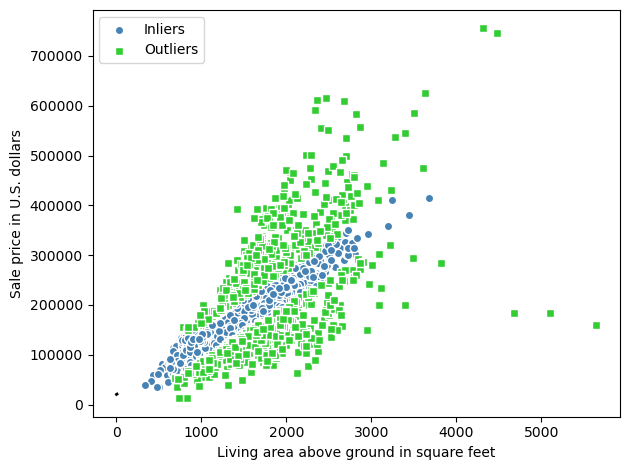

In [22]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_09.png', dpi=300)
plt.show()

In [23]:
ransac.estimator_.coef_

array([106.34799704])

In [24]:
ransac.estimator_.intercept_

20190.092616849084

# Adding polynominal terms

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [27]:
lr = LinearRegression()
pr =LinearRegression()

In [29]:
quadratic = PolynomialFeatures(degree =2)

In [30]:
X_quad = quadratic.fit_transform(X)

In [31]:
lr.fit(X,y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)


In [32]:
pr.fit(X_quad,y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

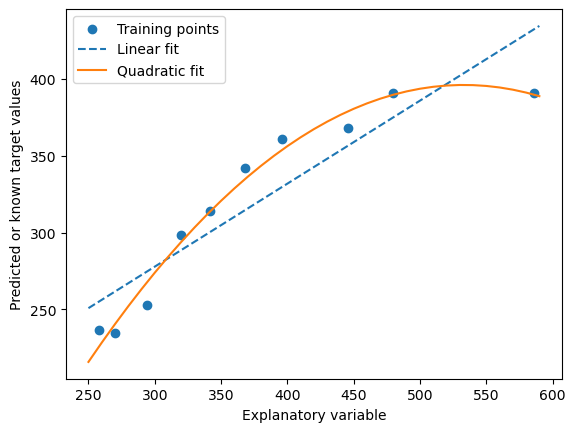

In [33]:
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
